In [1]:
# Importing necessary libraries for EDA
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# To load data of csv file from the device
sales = pd.read_csv("~/downloads/k_circle_sales.csv")

In [4]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.930,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,14.1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.2,OUT045,2002,NaN,NaN,Supermarket Type1,549.2850,14.2
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1,OUT035,2004,Small,Tier1,Supermarket Type1,1193.1136,9.5
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,1845.5976,14.2


In [5]:
# To check the shape of the data
sales.shape

(8523, 13)

In [6]:
# To get the complete info about the data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [8]:
# To getFive point summary 
sales.describe().T
# Here T is used for Transpose(converting rows into columns and vice-versa)

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7774.0,11.676740,5.776851,0.00,7.720000,11.800000,16.500000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.00,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.998838,62.258099,31.30,93.800000,142.700000,185.650000,266.900000
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.00,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.29,834.247400,1794.331000,3101.296400,13086.964800
Profit,8523.0,13.414514,1.701840,0.10,13.150000,13.900000,14.300000,24.000000


In [9]:
num_cols = sales.select_dtypes(include = np.number).columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')

In [10]:
cat_cols = sales.select_dtypes(include = "object").columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [11]:
sales[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7774.0,11.676740,5.776851,0.00,7.720000,11.800000,16.500000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.00,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.998838,62.258099,31.30,93.800000,142.700000,185.650000,266.900000
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.00,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.29,834.247400,1794.331000,3101.296400,13086.964800
Profit,8523.0,13.414514,1.701840,0.10,13.150000,13.900000,14.300000,24.000000


In [12]:
sales[cat_cols].describe().T

,count,unique,top,freq
Item_Identifier,8523,1559,FDW13,10
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,6473,8,Tier 2,2793
Outlet_Type,8523,4,Supermarket Type1,5577


In [13]:
sales[num_cols].mean()

Item_Weight                    11.676740
Item_Visibility                 0.066132
Item_MRP                      140.998838
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
Profit                         13.414514
dtype: float64

In [13]:
sales[num_cols].median()

Item_Weight                    11.800000
Item_Visibility                 0.053931
Item_MRP                      142.700000
Outlet_Establishment_Year    1999.000000
Item_Outlet_Sales            1794.331000
Profit                         13.900000
dtype: float64

In [14]:
sales[cat_cols].mode()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 2,Supermarket Type1
1,FDW13,NaN,NaN,NaN,NaN,NaN,NaN


# To perform EDA there are following steps:

1. Univariate Analysis 
2. BIvariate ANalysis 
3. Missing value
4. Outliers Treatment
5. Feature Engineering
6. Scaling and Transformation



# Univariate Analysis

In [15]:
#  for numeric column we make distplot and histplot
# for Category column we make countplot
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')

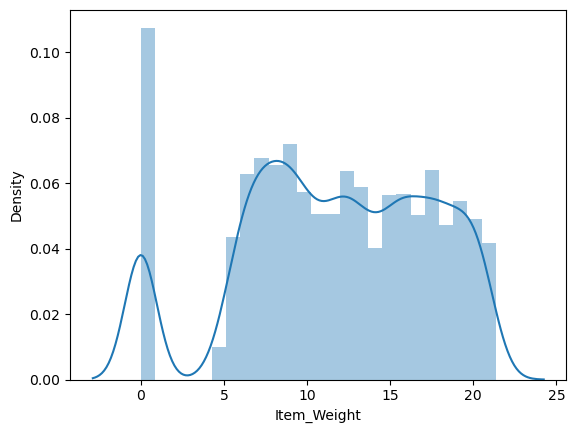

In [16]:
# for NUmeric 

sns.distplot(sales["Item_Weight"])
plt.show()

In [14]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

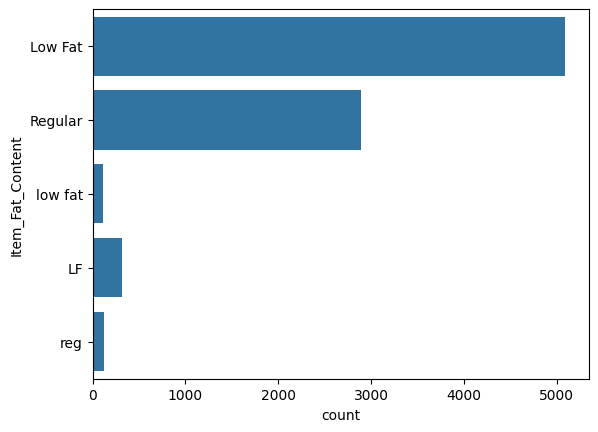

In [16]:
# For Category Columns
sns.countplot(sales["Item_Fat_Content"])
plt.show()

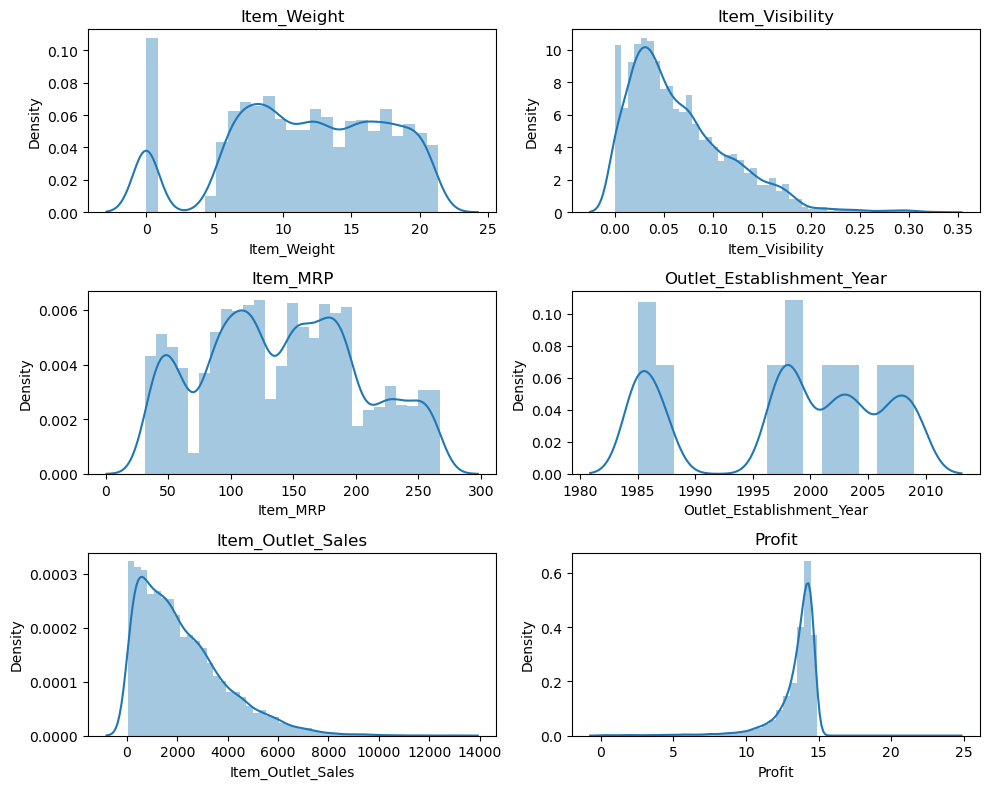

In [17]:
# For num_cols

plt.figure(figsize=(10,8))

a = 3
b= 2
c= 1
for i in num_cols:
    plt.subplot(a,b,c)
    sns.distplot(sales[i])
    plt.title(i)
    c+=1
plt.tight_layout()
plt.show()

In [18]:
sales[num_cols].skew()

Item_Weight                 -0.352215
Item_Visibility              1.167091
Item_MRP                     0.127390
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Profit                      -3.379808
dtype: float64

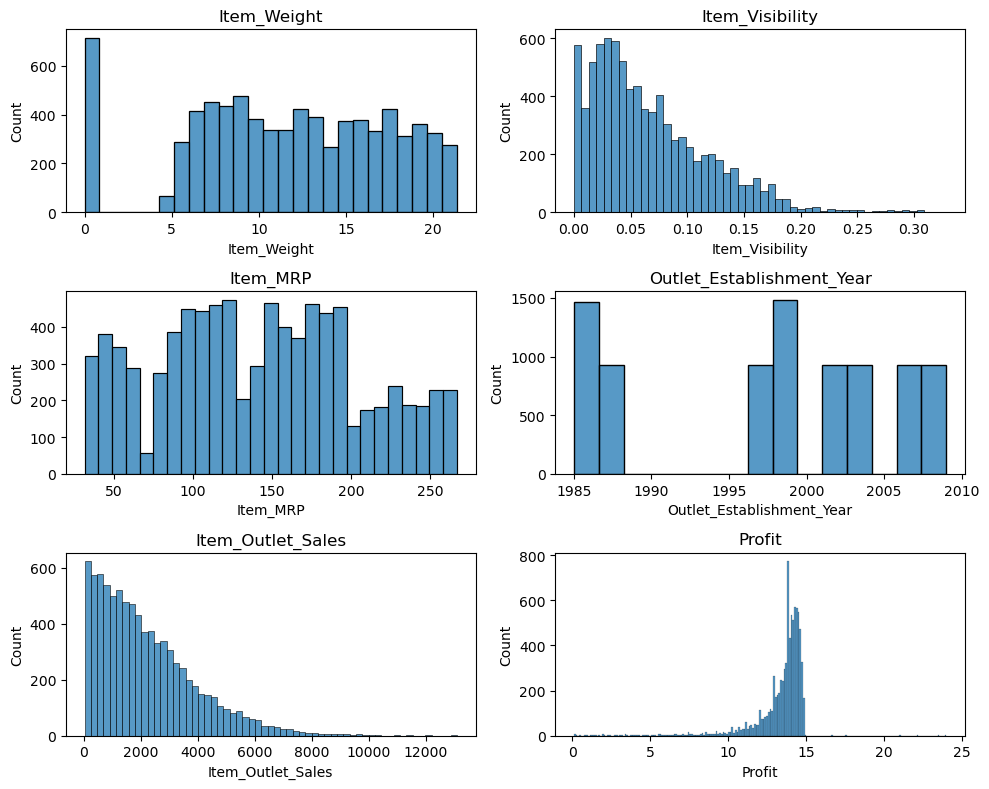

In [19]:
# For num_cols

plt.figure(figsize=(10,8))

a = 3
b= 2
c= 1
for i in num_cols:
    plt.subplot(a,b,c)
    sns.histplot(sales[i])
    plt.title(i)
    c+=1
plt.tight_layout()
plt.show()

In [20]:
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [21]:
sales["Item_Identifier"].nunique()

1559

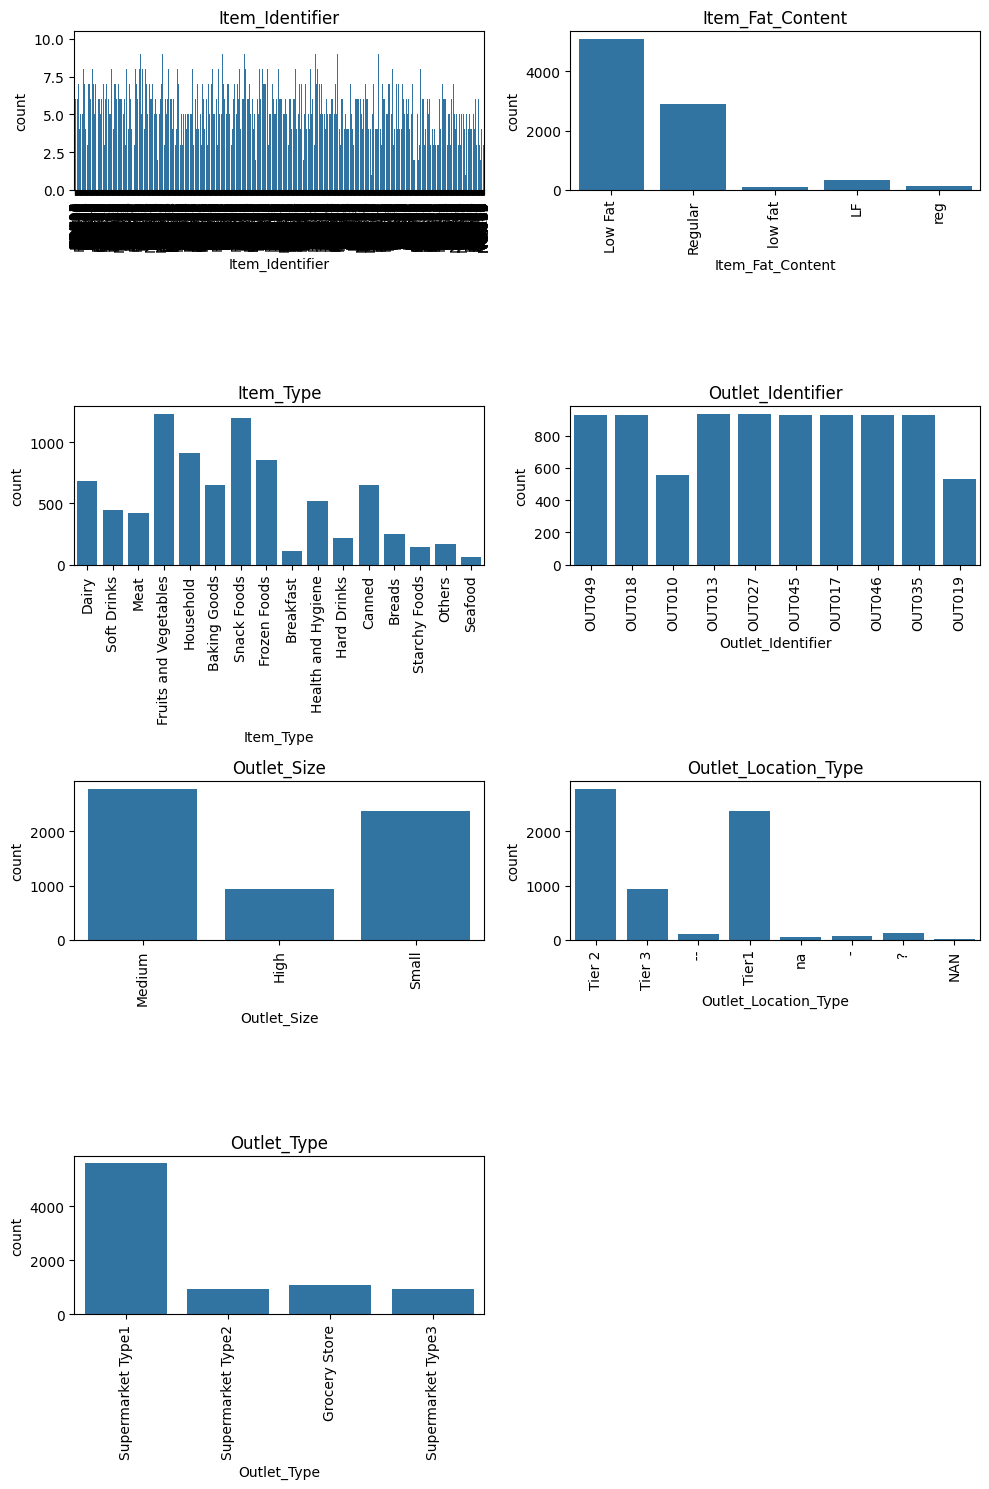

In [19]:
# For category 

plt.figure(figsize=(10,15))

a = 4
b= 2
c= 1
for i in cat_cols:
    plt.subplot(a,b,c)
    sns.countplot(x=sales[i], data=sales)
    plt.title(i)
    c+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [23]:
# BIvariate ANalysis 

# predictor vs target 
# num vs num - SCatterplot
# cat vs num - Boxplot, violin
# cat vs cat - frequency

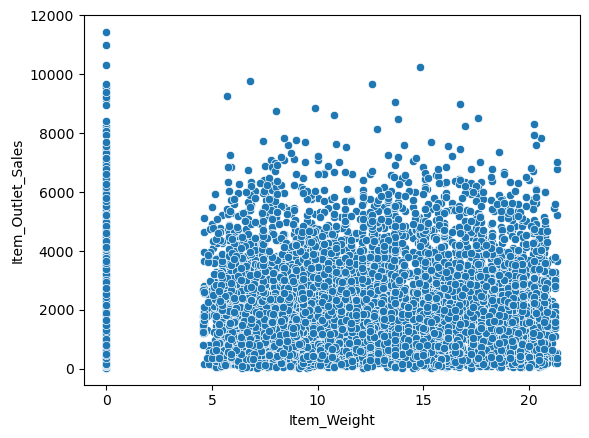

In [24]:
# num vs num - Scatterplot

sns.scatterplot(x = "Item_Weight", y = "Item_Outlet_Sales", data=sales)
plt.show()

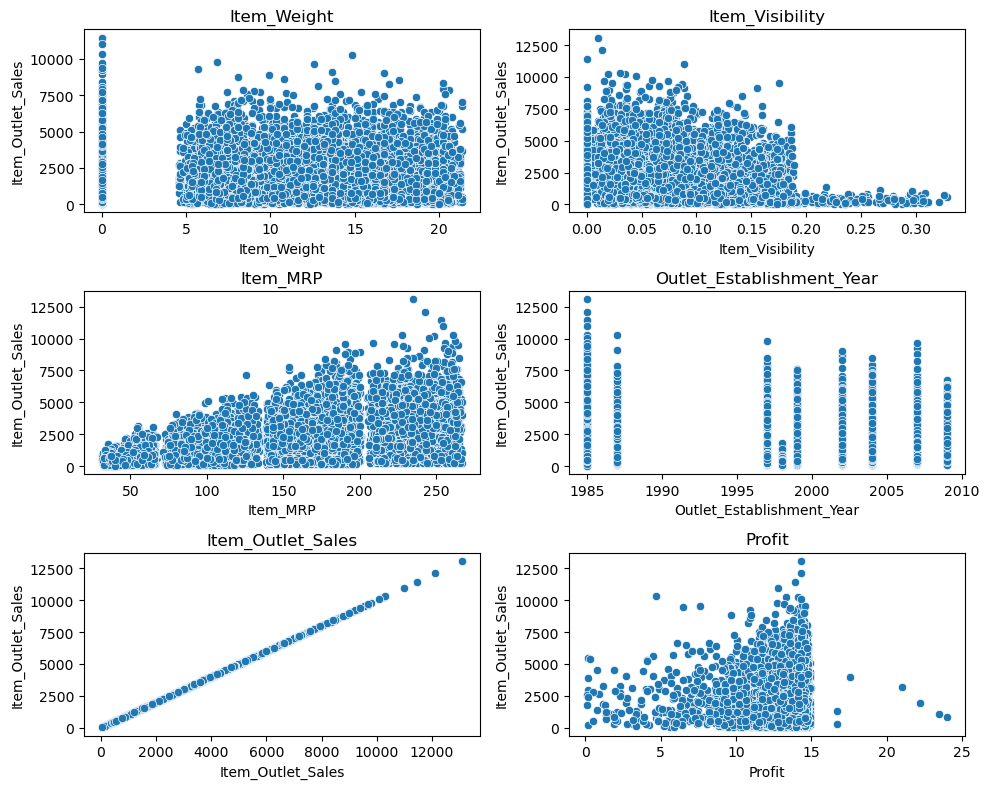

In [25]:
plt.figure(figsize=(10,8))

c= 1
for i in num_cols:
    plt.subplot(3,2,c)
    sns.scatterplot(x = sales[i],y="Item_Outlet_Sales", data=sales)
    plt.title(i)
    c+=1
    
plt.tight_layout()
plt.show()

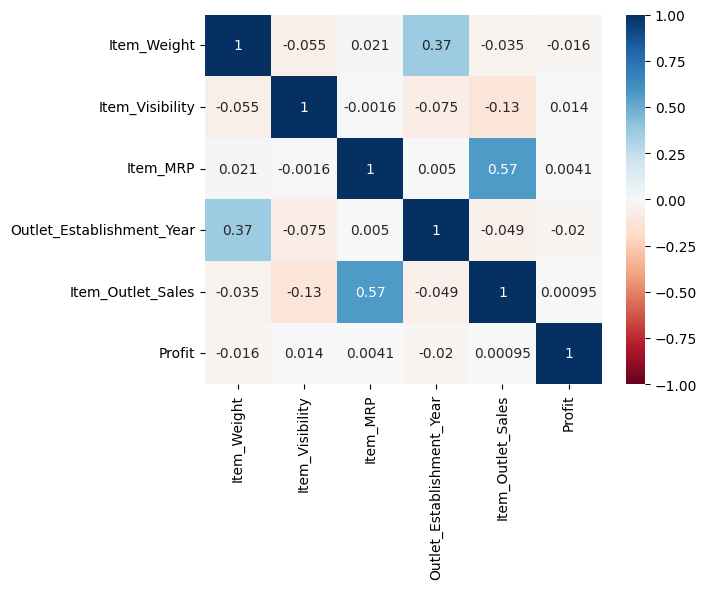

In [21]:
sns.heatmap(sales[num_cols].corr(),annot=True, cmap = "RdBu", vmin =-1 , vmax = +1)
plt.show()

In [27]:
# Missing Value 

sales.isnull().sum()

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [28]:
sales[sales["Item_Weight"].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.8,OUT027,1985,Medium,Tier 2,Supermarket Type3,4022.7636,13.3
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.3,OUT027,1985,Medium,Tier 2,Supermarket Type3,2303.6680,14.4
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5,OUT027,1985,Medium,Tier 2,Supermarket Type3,4064.0432,14.7
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.7,OUT019,1985,Small,Tier1,Grocery Store,214.3876,13.7
29,FDC14,NaN,Regular,0.072222,Canned,43.6,OUT019,1985,Small,Tier1,Grocery Store,125.8362,10.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8404,DRH39,NaN,low fat,0.000000,Dairy,76.0,OUT019,1985,Small,Tier1,Grocery Store,153.1340,14.6
8405,FDB09,NaN,Low Fat,0.100493,Fruits and Vegetables,123.1,OUT019,1985,Small,Tier1,Grocery Store,124.5046,11.3
8422,FDD08,NaN,Low Fat,0.035183,Fruits and Vegetables,37.9,OUT027,1985,Medium,Tier 2,Supermarket Type3,417.4566,13.9
8435,FDT48,NaN,Low Fat,0.000000,Baking Goods,196.5,OUT027,1985,Medium,Tier 2,Supermarket Type3,793.6336,14.6


In [29]:
sales["Item_Weight"].mean()

11.676739773604321

In [30]:
sales["Item_Weight"].median()

11.8

In [31]:
sales.groupby("Item_Identifier")["Item_Weight"].mean()

Item_Identifier
DRA12    11.600000
DRA24    16.125000
DRA59     7.088571
DRB01     4.926667
DRB13     6.115000
           ...    
NCZ30     6.590000
NCZ41    19.850000
NCZ42    10.500000
NCZ53     7.680000
NCZ54    12.208333
Name: Item_Weight, Length: 1559, dtype: float64

In [32]:
# sales["Item_Weight"].fillna(sales["Item_Weight"].mean())

In [33]:
sales["Item_Weight"] = sales.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))
sales["Item_Weight"]

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [34]:
sales[sales["Item_Weight"].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0,OUT027,1985,Medium,Tier 2,Supermarket Type3,4434.2280,14.5
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2,OUT019,1985,Small,Tier1,Grocery Store,120.5098,12.3


In [35]:
val1 = sales.loc[(sales["Item_Fat_Content"]== "Low Fat")  & (sales["Item_Type"]== "Snack Foods"), "Item_Weight"].mean()
val1

12.467088416888494

In [36]:
val2 = sales.loc[(sales["Item_Fat_Content"]== "Regular")  & (sales["Item_Type"]== "Baking Goods"), "Item_Weight"].mean()
val2

11.103739344262294

In [37]:
sales.loc[sales["Item_Identifier"] == "FDK57", "Item_Weight"] = np.round(val1, 2)

In [38]:
sales.loc[sales["Item_Identifier"] == "FDQ60", "Item_Weight"] = np.round(val2, 2)

In [39]:
sales[sales["Item_Weight"].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit


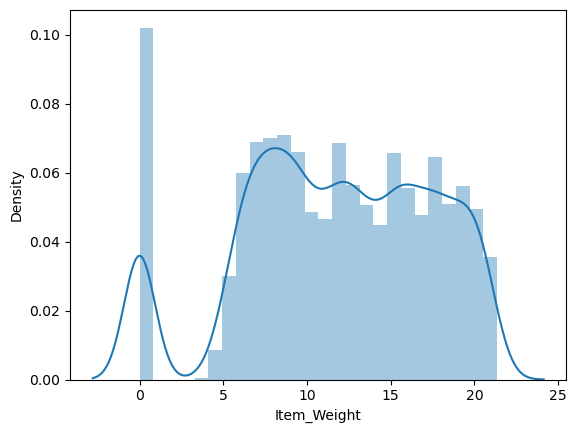

In [40]:
sns.distplot(sales["Item_Weight"])
plt.show()

In [23]:
weights = np.round(sales.groupby("Item_Identifier")
                ["Item_Weight"].mean(),2).to_dict()

In [42]:
#weights

In [24]:
sales["Item_Weight"] = sales["Item_Identifier"].map(weights)

In [44]:
# sales.loc[sales["Item_Weight"]==0] 

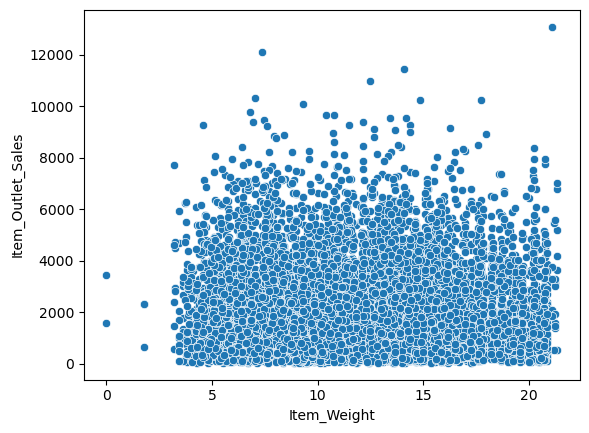

In [45]:
sns.scatterplot(x = sales["Item_Weight"], y="Item_Outlet_Sales", data=sales)
plt.show()

In [46]:
sales.loc[sales["Item_Weight"]==0] 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
927,FDN52,0.0,Regular,0.130933,Frozen Foods,86.9,OUT027,1985,Medium,Tier 2,Supermarket Type3,1569.9564,14.1
4187,FDE52,0.0,Regular,0.029742,Dairy,89.0,OUT027,1985,Medium,Tier 2,Supermarket Type3,3453.5046,13.9


In [47]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [48]:
# feature Engineering 

sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,14.58,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [49]:
sales["Item_Identifier"].nunique()

1559

In [50]:
sales["Item_Identifier"][1][:2]

'DR'

In [51]:
items = []
for i in sales["Item_Identifier"]:
    items.append(i[:2])
print(items)

['FD', 'DR', 'FD', 'FD', 'NC', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'NC', 'FD', 'DR', 'FD', 'FD', 'FD', 'NC', 'FD', 'FD', 'NC', 'FD', 'DR', 'FD', 'FD', 'FD', 'NC', 'FD', 'FD', 'DR', 'NC', 'FD', 'DR', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'NC', 'FD', 'FD', 'FD', 'NC', 'FD', 'FD', 'FD', 'NC', 'FD', 'NC', 'DR', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'DR', 'NC', 'FD', 'FD', 'FD', 'FD', 'NC', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'NC', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'DR', 'DR', 'FD', 'NC', 'FD', 'FD', 'FD', 'NC', 'FD', 'FD', 'FD', 'FD', 'DR', 'FD', 'FD', 'FD', 'FD', 'DR', 'DR', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'FD', 'DR', 'FD', 'NC', 'DR', 'FD', 'FD', 'FD', 'FD', 'DR', 'FD', 'DR', 'NC', 'FD', 'NC', 'NC', 'FD', 'FD', 'NC', 'FD', 'FD', 'FD', 'NC', 'NC', 'NC', 'NC', 'NC', 'FD', 'FD', 'FD', 'NC', 'FD', 'NC', 'DR', 'FD', 'FD', 'DR', 'FD', 'NC', 'FD', 'FD', 'DR', 'FD', 'FD', 'FD', 'FD', 'DR', 'FD', 'DR', 'FD

In [52]:
sales["IDs"] = items

In [53]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,IDs
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,DR
2,FDN15,14.58,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,NC


In [103]:
sales["IDs"].unique()

array(['FD', 'DR', 'NC'], dtype=object)

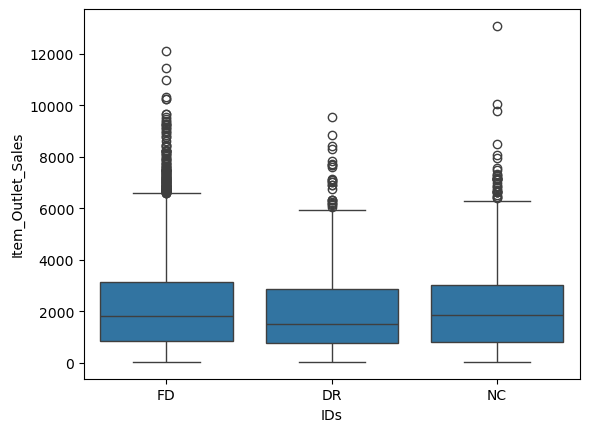

In [104]:
sns.boxplot(x = sales["IDs"], y="Item_Outlet_Sales", data=sales)
plt.show()

In [105]:
sales["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

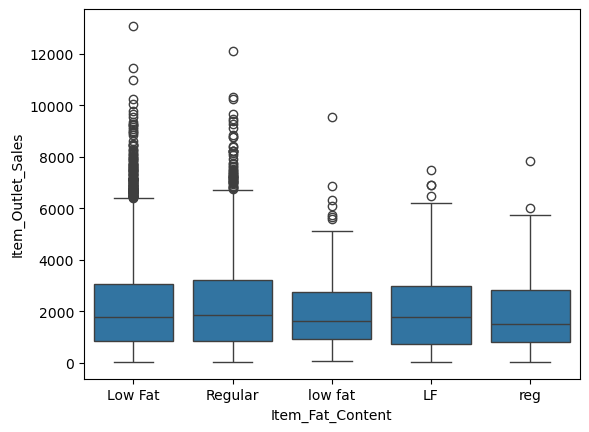

In [106]:
sns.boxplot(x = sales["Item_Fat_Content"], y="Item_Outlet_Sales", data=sales)
plt.show()

In [107]:
sales["Item_Fat_Content"].replace(to_replace =['Low Fat', 'Regular', 'low fat', 'LF', 'reg'],
value=['Low Fat', 'Regular', 'Low Fat', 'Low Fat', 'Regular'], inplace=True)

In [108]:
sales.groupby("IDs")["Item_Fat_Content"].describe()

,count,unique,top,freq
IDs,,,,
DR,799,2,Low Fat,728
FD,6125,2,Low Fat,3190
NC,1599,1,Low Fat,1599


In [109]:
sales.loc[sales["IDs"]=="NC", "Item_Fat_Content"] = "Non-Edible"

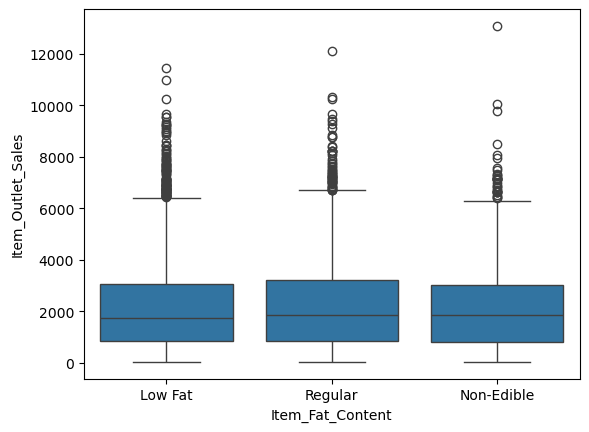

In [110]:
sns.boxplot(x = sales["Item_Fat_Content"], y="Item_Outlet_Sales", data=sales)
plt.show()

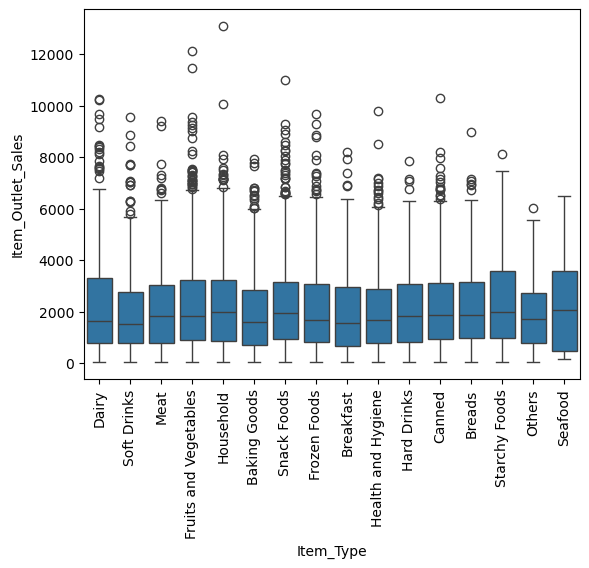

In [111]:
sns.boxplot(x = sales["Item_Type"], y="Item_Outlet_Sales", data=sales)
plt.xticks(rotation=90)
plt.show()

In [112]:
sales["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [113]:
Perishables = ["Dairy","Meat","Fruits and Vegetables","Breakfast","Breads","Starchy Foods","Seafood"]

In [114]:
def perish(x):
    if x in Perishables:
        return "Perishables"
    else:
        return "Non-Perishables"

In [115]:
sales["Item_Type"] = sales["Item_Type"].apply(perish)

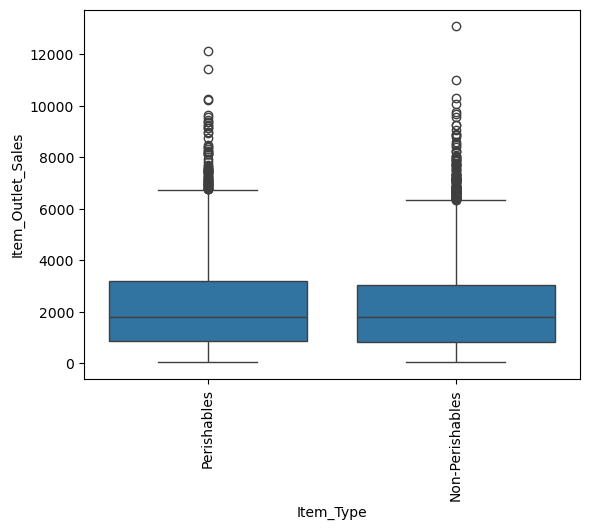

In [116]:
sns.boxplot(x = sales["Item_Type"], y="Item_Outlet_Sales", data=sales)
plt.xticks(rotation=90)
plt.show()

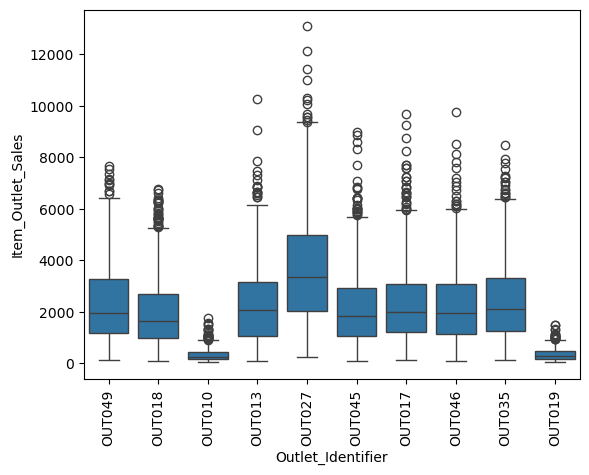

In [117]:
sns.boxplot(x = sales["Outlet_Identifier"], y="Item_Outlet_Sales", data=sales)
plt.xticks(rotation=90)
plt.show()

In [118]:
High = ["OUT013","OUT027"]
Low = ["OUT010","OUT019"]

In [119]:
def items(x):
    if x in High:
        return "High"
    elif x in Low:
        return "Low"
    else:
        return "Average"

In [120]:
sales["Outlet_Identifier"] = sales["Outlet_Identifier"].apply(items)

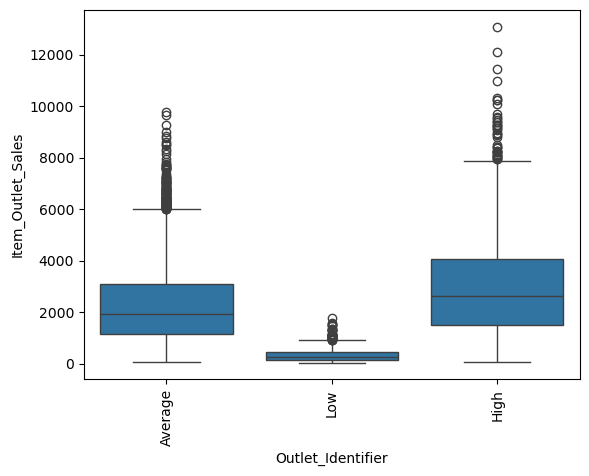

In [121]:
sns.boxplot(x = sales["Outlet_Identifier"], y="Item_Outlet_Sales", data=sales)
plt.xticks(rotation=90)
plt.show()

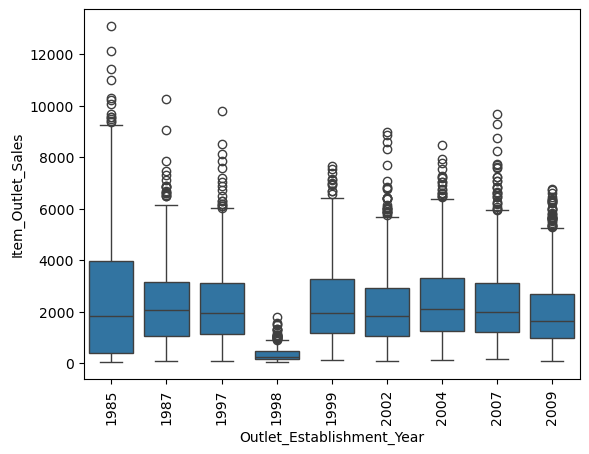

In [122]:
sns.boxplot(x = "Outlet_Establishment_Year", y="Item_Outlet_Sales", data=sales)
plt.xticks(rotation=90)
plt.show()

In [123]:
vals = np.round(sales.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].mean(),2).to_dict()
vals

{1985: 2483.68,
 1987: 2299.0,
 1997: 2277.84,
 1998: 339.35,
 1999: 2348.35,
 2002: 2192.38,
 2004: 2438.84,
 2007: 2340.68,
 2009: 1995.5}

In [124]:
sales["Outlet_Establishment_Year"].map(vals)

0       2348.35
1       1995.50
2       2348.35
3        339.35
4       2299.00
         ...   
8518    2299.00
8519    2192.38
8520    2438.84
8521    1995.50
8522    2277.84
Name: Outlet_Establishment_Year, Length: 8523, dtype: float64

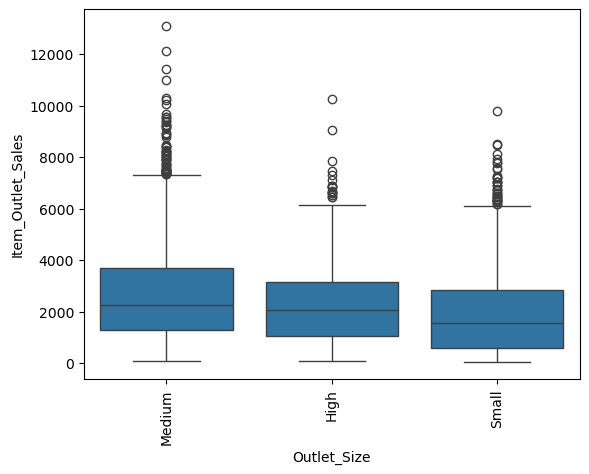

In [125]:
sns.boxplot(x = "Outlet_Size", y="Item_Outlet_Sales", data=sales)
plt.xticks(rotation=90)
plt.show()

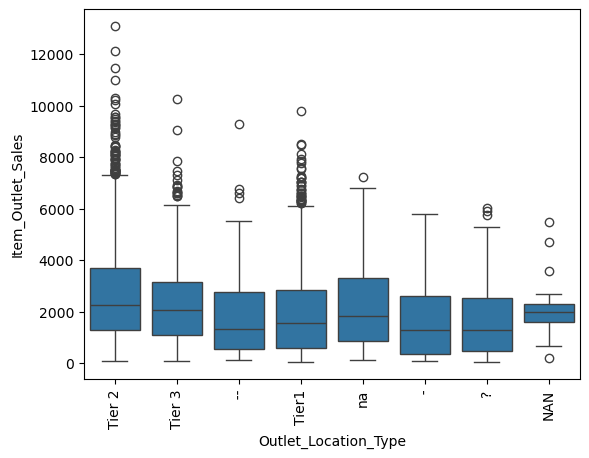

In [126]:
sns.boxplot(x = "Outlet_Location_Type", y="Item_Outlet_Sales", data=sales)
plt.xticks(rotation=90)
plt.show()

In [127]:
sales["Outlet_Location_Type"].unique()

array(['Tier 2', nan, 'Tier 3', '  --', 'Tier1', 'na', '  -', '?', 'NAN'],
      dtype=object)

In [128]:
Noise = ['nan', '  --', 'na', '  -', '?', 'NAN']

In [129]:
#sales["Outlet_Location_Type"].apply(noise)

In [130]:
sales["Outlet_Location_Type"].replace(to_replace = Noise, value = ["Missing"]*6, inplace = True)

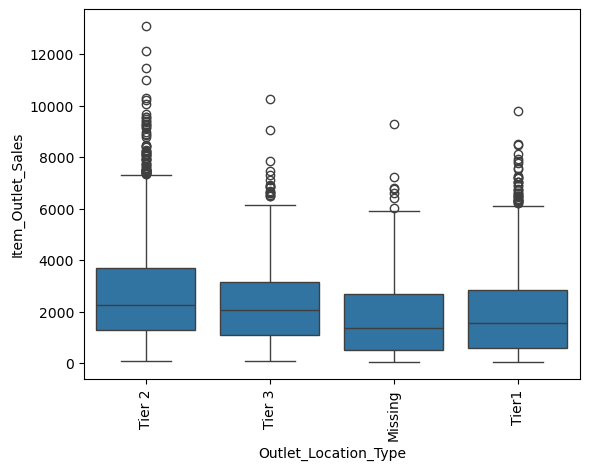

In [131]:
sns.boxplot(x = "Outlet_Location_Type", y="Item_Outlet_Sales", data=sales)
plt.xticks(rotation=90)
plt.show()

In [132]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,IDs
0,FDA15,9.30,Low Fat,0.016047,Perishables,249.8,Average,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,FD
1,DRC01,5.92,Regular,0.019278,Non-Perishables,48.3,Average,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,DR
2,FDN15,14.58,Low Fat,0.016760,Perishables,141.6,Average,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,FD
3,FDX07,19.20,Regular,0.000000,Perishables,182.1,Low,1998,NaN,NaN,Grocery Store,732.3800,13.6,FD
4,NCD19,8.93,Non-Edible,0.000000,Non-Perishables,53.9,High,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,NC


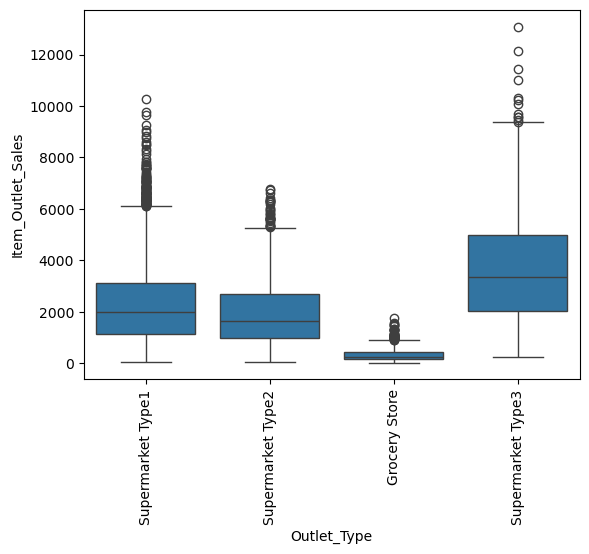

In [133]:
sns.boxplot(x = "Outlet_Type", y="Item_Outlet_Sales", data=sales)
plt.xticks(rotation=90)
plt.show()

In [134]:
newsales = sales.drop("Item_Identifier", axis=1)

In [135]:
newsales

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,IDs
0,9.30,Low Fat,0.016047,Perishables,249.8,Average,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,FD
1,5.92,Regular,0.019278,Non-Perishables,48.3,Average,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,DR
2,14.58,Low Fat,0.016760,Perishables,141.6,Average,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,FD
3,19.20,Regular,0.000000,Perishables,182.1,Low,1998,NaN,NaN,Grocery Store,732.3800,13.6,FD
4,8.93,Non-Edible,0.000000,Non-Perishables,53.9,High,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.86,Low Fat,0.056783,Non-Perishables,214.5,High,1987,High,Tier 3,Supermarket Type1,2778.3834,14.1,FD
8519,8.38,Regular,0.046982,Non-Perishables,108.2,Average,2002,NaN,NaN,Supermarket Type1,549.2850,14.2,FD
8520,10.60,Non-Edible,0.035186,Non-Perishables,85.1,Average,2004,Small,Tier1,Supermarket Type1,1193.1136,9.5,NC
8521,7.21,Regular,0.145221,Non-Perishables,103.1,Average,2009,Medium,Tier 2,Supermarket Type2,1845.5976,14.2,FD


In [138]:
# Scaling and Transformation 

#1. Scaling - Numeric Columns 

# Zscore  - Statistics 
# Machine learning - Standard Scaler, MinMaxScaler, RobustScaler

#2. Encoding - Categorical columns

# dummy Encoding 
# One-hot encoding 
# label encoding
# ordinal Encoding 
# frequency Encoding
# Target Encoding (Mean-Encoding) - Classification problem 


#3. Transformation 

# Log Transforamtion 
# Exponential Transformation
# Square root 
# Box-Cox 
# Yeo-Johnson

In [139]:
from scipy.stats import stats

In [146]:
scaled_zs = pd.DataFrame(stats.zscore(sales[num_cols]))
scaled_zs

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,-0.547028,-0.970732,1.747685,0.139541,0.910601,-1.125033
1,-1.305625,-0.908111,-1.489032,1.334103,-1.018440,0.520342
2,0.638000,-0.956917,0.009657,0.139541,-0.049238,0.637869
3,1.674898,-1.281758,0.660212,0.020085,-0.849103,0.108998
4,-0.630069,-1.281758,-1.399078,-1.293934,-0.695373,0.402815
...,...,...,...,...,...,...
8518,-1.094654,-0.181193,1.180657,-1.293934,0.349915,0.402815
8519,-0.753510,-0.371154,-0.526851,0.497909,-0.956402,0.461578
8520,-0.255260,-0.599784,-0.897909,0.736822,-0.579100,-2.300301
8521,-1.016101,1.532880,-0.608773,1.334103,-0.196725,0.461578


In [145]:
scaled_zs.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,3.739040e-16,-1.092117e-16,4.460171e-17,1.156560e-14,1.638175e-16,1.850762e-16
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-2.634291e+00,-1.281758e+00,-1.762104e+00,-1.532846e+00,-1.258790e+00,-7.824059e+00
25%,-8.713390e-01,-7.586531e-01,-7.581601e-01,-1.293934e+00,-7.894057e-01,-1.554372e-01
50%,-5.326632e-02,-2.364792e-01,2.732594e-02,1.395408e-01,-2.267687e-01,2.852882e-01
75%,7.704173e-01,5.514755e-01,7.172365e-01,7.368218e-01,5.391513e-01,5.203418e-01
max,2.157438e+00,5.083050e+00,2.022364e+00,1.334103e+00,6.391045e+00,6.220390e+00


In [149]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [152]:
sc = StandardScaler()
mm = MinMaxScaler()
rs = RobustScaler()

In [157]:
scaled_sc = pd.DataFrame(sc.fit_transform(sales[num_cols]))
scaled_sc

,0,1,2,3,4,5
0,-0.547028,-0.970732,1.747685,0.139541,0.910601,-1.125033
1,-1.305625,-0.908111,-1.489032,1.334103,-1.018440,0.520342
2,0.638000,-0.956917,0.009657,0.139541,-0.049238,0.637869
3,1.674898,-1.281758,0.660212,0.020085,-0.849103,0.108998
4,-0.630069,-1.281758,-1.399078,-1.293934,-0.695373,0.402815
...,...,...,...,...,...,...
8518,-1.094654,-0.181193,1.180657,-1.293934,0.349915,0.402815
8519,-0.753510,-0.371154,-0.526851,0.497909,-0.956402,0.461578
8520,-0.255260,-0.599784,-0.897909,0.736822,-0.579100,-2.300301
8521,-1.016101,1.532880,-0.608773,1.334103,-0.196725,0.461578


In [158]:
scaled_sc.describe()

,0,1,2,3,4,5
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,3.739040e-16,-1.092117e-16,4.460171e-17,1.156560e-14,1.638175e-16,1.850762e-16
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-2.634291e+00,-1.281758e+00,-1.762104e+00,-1.532846e+00,-1.258790e+00,-7.824059e+00
25%,-8.713390e-01,-7.586531e-01,-7.581601e-01,-1.293934e+00,-7.894057e-01,-1.554372e-01
50%,-5.326632e-02,-2.364792e-01,2.732594e-02,1.395408e-01,-2.267687e-01,2.852882e-01
75%,7.704173e-01,5.514755e-01,7.172365e-01,7.368218e-01,5.391513e-01,5.203418e-01
max,2.157438e+00,5.083050e+00,2.022364e+00,1.334103e+00,6.391045e+00,6.220390e+00


In [159]:
scaled_mm = pd.DataFrame(mm.fit_transform(sales[num_cols]))
scaled_mm

,0,1,2,3,4,5
0,0.435597,0.048866,0.927419,0.583333,0.283587,0.476987
1,0.277283,0.058705,0.072156,1.000000,0.031419,0.594142
2,0.682904,0.051037,0.468166,0.583333,0.158115,0.602510
3,0.899297,0.000000,0.640068,0.541667,0.053555,0.564854
4,0.418267,0.000000,0.095925,0.083333,0.073651,0.585774
...,...,...,...,...,...,...
8518,0.321311,0.172914,0.777589,0.083333,0.210293,0.585774
8519,0.392506,0.143069,0.326401,0.708333,0.039529,0.589958
8520,0.496487,0.107148,0.228353,0.791667,0.088850,0.393305
8521,0.337705,0.442219,0.304754,1.000000,0.138835,0.589958


In [160]:
scaled_mm.describe()

,0,1,2,3,4,5
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.549758,0.201382,0.465615,0.534661,0.164551,0.557093
std,0.208705,0.157123,0.264253,0.348823,0.130729,0.071207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.367916,0.082187,0.265280,0.083333,0.061359,0.546025
50%,0.538642,0.164228,0.472835,0.583333,0.134908,0.577406
75%,0.710539,0.288026,0.655136,0.791667,0.235030,0.594142
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [161]:
scaled_rs = pd.DataFrame(rs.fit_transform(sales[num_cols]))
scaled_rs

,0,1,2,3,4,5
0,-0.300752,-0.560443,1.166032,0.000000,0.856094,-2.086957
1,-0.762816,-0.512646,-1.027763,0.588235,-0.595888,0.347826
2,0.421053,-0.549899,-0.011976,0.000000,0.133627,0.521739
3,1.052632,-0.797844,0.428960,-0.058824,-0.468429,-0.260870
4,-0.351333,-0.797844,-0.966794,-0.705882,-0.352717,0.173913
...,...,...,...,...,...,...
8518,-0.634313,0.042199,0.781709,-0.705882,0.434068,0.173913
8519,-0.426521,-0.102795,-0.375612,0.176471,-0.549192,0.260870
8520,-0.123035,-0.277305,-0.627109,0.294118,-0.265198,-3.826087
8521,-0.586466,1.350523,-0.431138,0.588235,0.022614,0.260870


In [162]:
scaled_rs.describe()

,0,1,2,3,4,5
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.032445,0.180501,-0.018521,-0.068714,0.170688,-0.422162
std,0.609140,0.763329,0.677824,0.492456,0.752741,1.479861
min,-1.572112,-0.797844,-1.212847,-0.823529,-0.776799,-12.000000
25%,-0.498291,-0.398567,-0.532390,-0.705882,-0.423495,-0.652174
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.501709,0.601433,0.467610,0.294118,0.576505,0.347826
max,1.346548,4.060311,1.352205,0.588235,4.981204,8.782609


In [164]:
pd.DataFrame(pd.get_dummies(sales[cat_cols]))

,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Item_Type_Non-Perishables,Item_Type_Perishables,Outlet_Identifier_Average,Outlet_Identifier_High,Outlet_Identifier_Low,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Missing,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier1,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,True,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,False,False
1,False,False,True,True,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False
2,True,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,False,False
3,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False
4,False,True,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False
8519,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
8520,False,True,False,True,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False
8521,False,False,True,True,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False


In [167]:
pd.DataFrame(pd.get_dummies(sales[cat_cols],drop_first=True))

,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Item_Type_Perishables,Outlet_Identifier_High,Outlet_Identifier_Low,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier1,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,False,False,True,False,False,True,False,True,False,False,True,False,False
1,False,True,False,False,False,True,False,True,False,False,False,True,False
2,False,False,True,False,False,True,False,True,False,False,True,False,False
3,False,True,True,False,True,False,False,False,False,False,False,False,False
4,True,False,False,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,True,False,False,False,False,True,False,True,False,False
8519,False,True,False,False,False,False,False,False,False,False,True,False,False
8520,True,False,False,False,False,False,True,False,False,True,True,False,False
8521,False,True,False,False,False,True,False,True,False,False,False,True,False


In [168]:
# Splitting the Data

from sklearn.model_selection import train_test_split

In [170]:
x = newsales.drop("Item_Outlet_Sales", axis=1)
y = newsales["Item_Outlet_Sales"]

In [171]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 30, random_state=0)

In [172]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((8493, 12), (8493,), (30, 12), (30,))

In [173]:
from sklearn.linear_model import LinearRegression

In [174]:
lr = LinearRegression()